# Testing Slope Fitting on Synthetic PSDs

In [1]:
# This notebook uses py2.7 - because that's what FOOF is written in
from __future__ import print_function, division

In [2]:
# Bayes FOOF has a dependency of sklearn version >= 0.18.0. Check this.
import sklearn
assert sklearn.__version__[:4] == '0.18'

In [3]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Custom code imports
#  NOTE: Currently, settings in slf.fit will set which FOOF to use
from slf.fit import *
from foof import syn

## Check out PSD generation and test fitting

In [55]:
# Generate a single synthetic PSD

slv_test = 0.7

fs, psd = syn.mfonef(
    mf=[10],
    mf_sig=[1],
    mk=[0.1],
    chi=slv_test,
    f0=3,
    fmax=40,
    res=0.5,
    noi=0.05
)

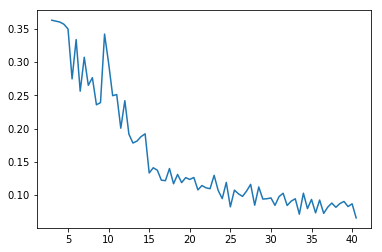

In [56]:
# Check plot of the synthetic PSD
plt.plot(fs, psd)

In [65]:
# Test out fits
print('True slope value is ', str(slv_test), '\n')
print('RLM fit: \t', fsl_rlm(fs, psd))
print('RLM-EA fit: \t', fsl_rlm_alph(fs, psd))
print('RLM-EO fit: \t', fsl_rlm_oscs(fs, psd))
print('RAN fit: \t', fsl_ransac(fs, psd))
print('RAN-EA fit: \t', fsl_ransac_alph(fs, psd))
print('RAN-EO fit: \t', fsl_ransac_oscs(fs, psd))

True slope value is  0.7 

RLM fit: 	 -0.708116558076
RLM-EA fit: 	 -0.648725837062
RLM-EO fit: 	 -0.645490045044
RAN fit: 	 -0.716401797143
RAN-EA fit: 	 -0.687471308688
RAN-EO fit: 	 -0.50855057133


## Run a bunch of synthetic fits

In [69]:
# Settings for syn data generation and slope fitting
slv = 1
n_psds = 100

In [70]:
# Initialize stuff for synthetic data fitting runs

# NOTE: This is almost definitely a terrible way to organize these runs. 
#  TODO: Fix this shit. 

fit_funcs = {'RLM': fsl_rlm, 
             'RLM-EA': fsl_rlm_alph, 
             'RLM-EO': fsl_rlm_oscs, 
             'RAN': fsl_ransac,
             'RAN-EA': fsl_ransac_alph,
             'RAN-EO': fsl_ransac_oscs}

errs = dict()
for key in fit_funcs.keys():
    errs[key] = []

In [71]:
# Synthesize data
fs, psds = syn.synthesize(n_psds, fn=syn.mfonef, 
                          mf=[10], mf_sig=[1], mk=[0.2], chi=slv, 
                          f0=3, fmax=40, res=0.5, noi=0.05)

In [72]:
# Fit slope and collect error
for k, fn in fit_funcs.items():
    for i in range(n_psds):
        errs[k].append(sqd_err(-slv, fn(fs, psds[:, i])))

In [73]:
# Calculate mean errors per method
mean_errs = []
for k, v in errs.items():
    mean_errs.append((np.mean(v), k))
mean_errs.sort()

In [74]:
# Print out errors per method
for me in mean_errs:
    print(me[1], '\t', me[0])

RLM-EA 	 0.0005873633231
RLM-EO 	 0.000683909711142
RAN-EO 	 0.00073638286376
RAN 	 0.00131511444279
RAN-EA 	 0.00162802181188
RLM 	 0.00287509998033
